In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm


#### 1. Central limit theoreum
##### The distribution of large samples of an independent variable is normal, regardless of the distribution of the independent variable

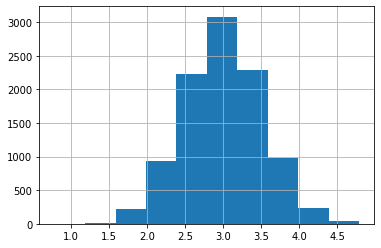

In [4]:
num_samples = 10000
samples = norm.rvs(loc=3, scale=.5, size=(1, num_samples))[0]
lunch_time = pd.Series(np.exp(samples),name='lunch time in minutes')
log_lunch_time = pd.Series(samples, name='log of lunch time in minutes')
log_lunch_time.hist() 

#### 2. Create two uncorrelated normal distributions

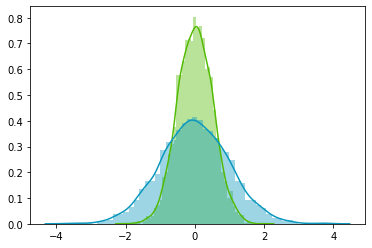

In [8]:
from scipy.stats import norm
import seaborn as sns

num_samples = 5000
signal01 = norm.rvs(loc=0, scale=.5, size=(1, num_samples))[0]
signal02 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]
sns.distplot(signal01, color="#53BB04")
sns.distplot(signal02, color="#0A98BE")

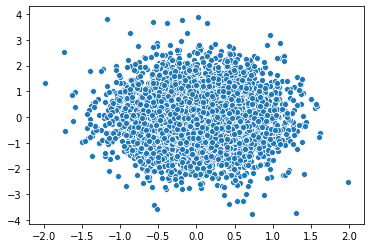

In [9]:
sns.scatterplot(signal01,signal02)

#### Shows those two normal distributions are uncorrelated

In [10]:
np.corrcoef(signal01, signal02)

array([[ 1.        , -0.00546747],
       [-0.00546747,  1.        ]])

#### 3. adding correlation to uncorrelated normal distributions

In [11]:
import numpy as np
from scipy.stats import norm
num_samples = 5000

signal01 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]
signal02 = norm.rvs(loc=0, scale=1, size=(1, num_samples))[0]

##### 3.1 specify desired std and correlations

In [12]:
std01 = 11.2
std02 = 0.5

std_m = np.array([
    [std01, 0],
    [0, std02]
])

# specify desired correlation
corr_m = np.array([
    [1, .75],
    [.75, 1]
])

# calc desired covariance (vc matrix)
cov_m = np.dot(std_m, np.dot(corr_m, std_m))

#### 3.2. Use Cholesky’s algorithm to decompose the vc matrix